In [20]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from datetime import datetime

In [24]:
# Download Apple stock data from Yahoo Finance
df = yf.download('AAPL', start='2020-01-01', end='2025-01-01', auto_adjust=False)

# Reset index to move 'Date' from index to column
df.reset_index(inplace=True)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2020-01-02,72.620850,75.087502,75.150002,73.797501,74.059998,135480400
1,2020-01-03,71.914810,74.357498,75.144997,74.125000,74.287498,146322800
2,2020-01-06,72.487846,74.949997,74.989998,73.187500,73.447502,118387200
3,2020-01-07,72.146957,74.597504,75.224998,74.370003,74.959999,108872000
4,2020-01-08,73.307533,75.797501,76.110001,74.290001,74.290001,132079200


In [26]:
print(df.isnull().sum())

Price      Ticker
Date                 0
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64


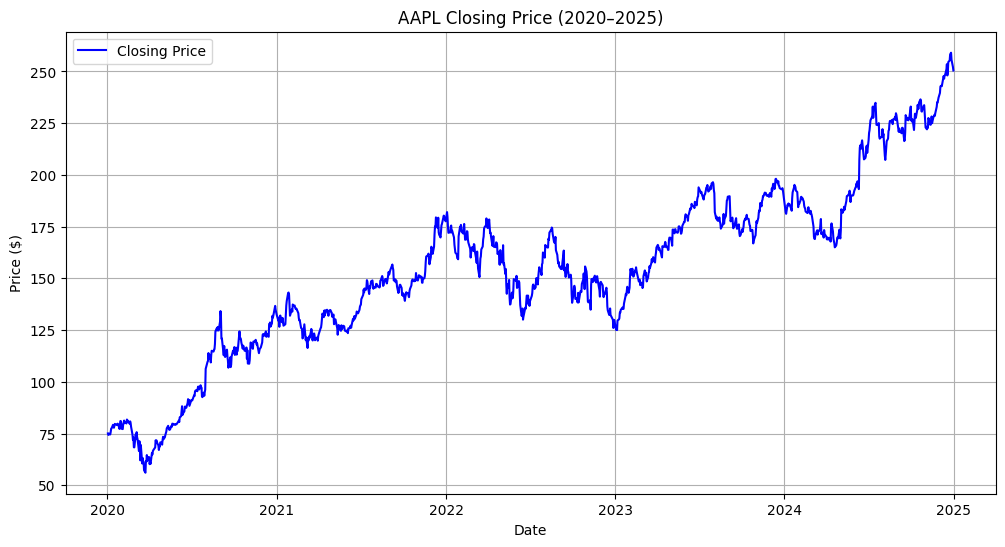

In [28]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.title('AAPL Closing Price (2020–2025)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

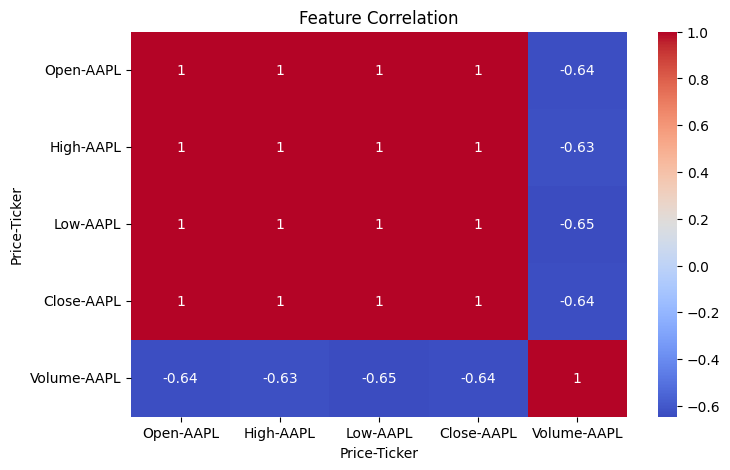

In [30]:
plt.figure(figsize=(8,5))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

In [32]:
# Select Features and Target
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

# Drop NA just in case
df.dropna(inplace=True)

X = df[features]
y = df[target]

# Split data by time (not random split to maintain time-series integrity)
split_index = int(len(df) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
dates_test = df['Date'][split_index:]  # Keep dates for plotting


In [34]:
# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)

In [36]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 MSE: {mse:.2f}")
print(f"📊 RMSE: {rmse:.2f}")
print(f"📊 MAE: {mae:.2f}")
print(f"📊 R² Score: {r2:.4f}")

📊 MSE: 1.18
📊 RMSE: 1.09
📊 MAE: 0.81
📊 R² Score: 0.9982


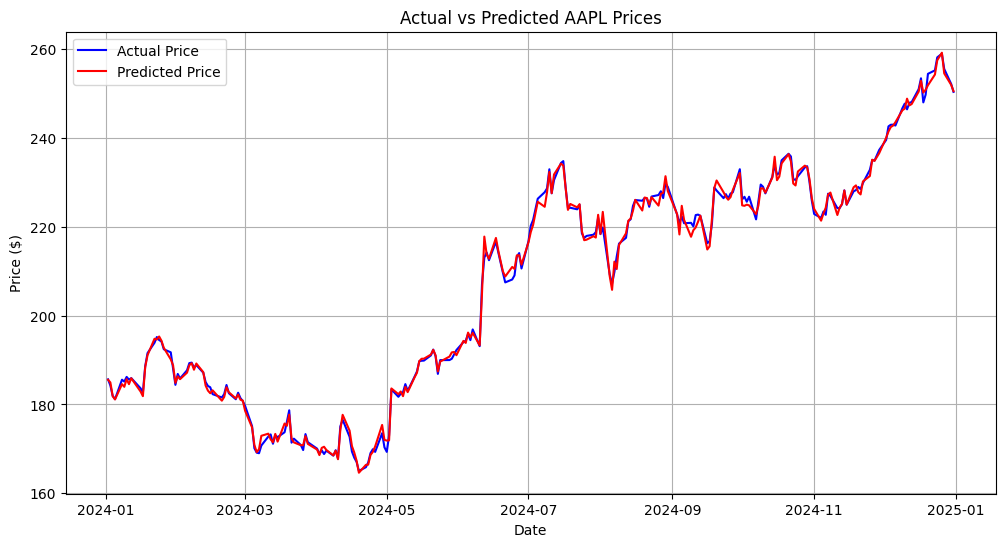

In [38]:
plt.figure(figsize=(12,6))
plt.plot(dates_test, y_test.values, label='Actual Price', color='blue')
plt.plot(dates_test, y_pred, label='Predicted Price', color='red')
plt.title('Actual vs Predicted AAPL Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()


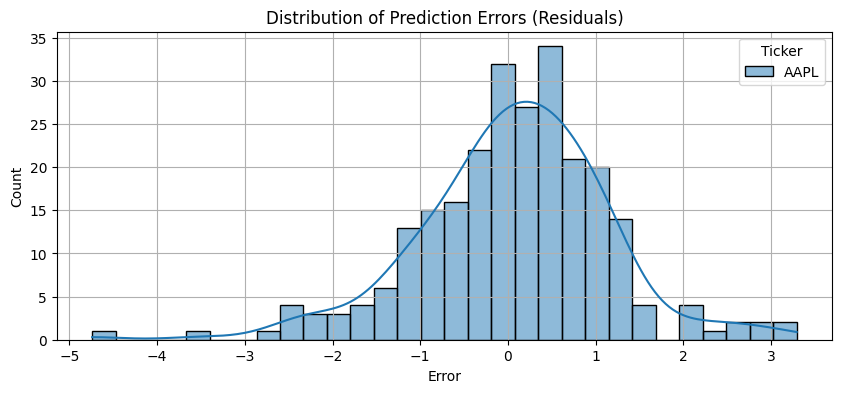

In [40]:
residuals = y_test - y_pred
plt.figure(figsize=(10,4))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Error")
plt.grid(True)
plt.show()
